<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

Name: Jolie Dolan<br>
RIN: 662020565

## Question 1

You are provided with a dataset of different aircraft that includes three columns:Aircraft (string; not used in clustering), Speed_kmh (cruise speed in km/h), and FuelFlow_kgph (cruise fuel flow in kg/hour for the whole aircraft). Using only the numeric features Speed_kmh and FuelFlow_kgph, apply k-means clustering to group the aircraft
into meaningful performance categories. Be sure to standardize the features (for example, with StandardScaler) before clustering. For values of k from 2 to 6, compute the silhouette score and plot the score as a function of k. Based on your plot, select a reasonable value
of k, fit k-means, and create a scatter plot of cruise speed versus fuel flow where points are colored according to their assigned cluster.<br> Finally, briefly interpret each cluster in engineering terms, for example, “fast and high fuel flow corresponds to jets,” while
“slower and very low fuel flow corresponds to general aviation aircraft.” As an optional step, you may label a few representative aircraft on your plot to make the clusters more interpretable.

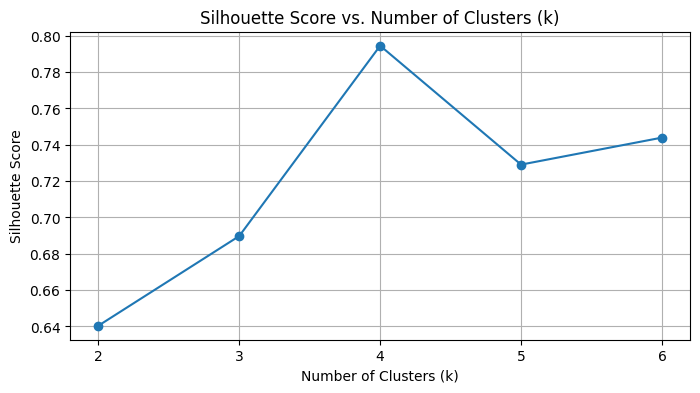

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# initialization
df = pd.read_csv('/content/sample_data/aircraft_performance.csv')

features = ['Speed_kmh', 'FuelFlow_kgph']
X = df[features]

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute silhouette scores for k from 2 to 6
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to avoid warning
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# plotting silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

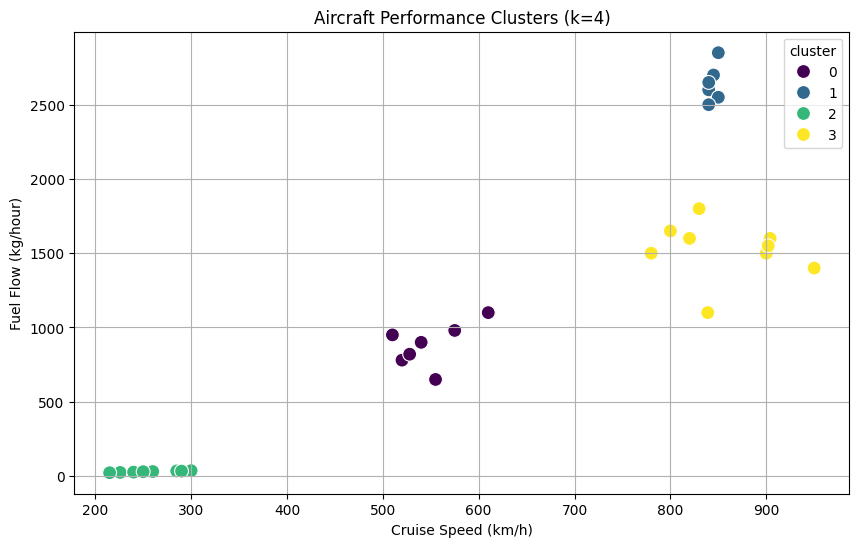

In [26]:
# from plot, chose reasonable k value
optimal_k = 4

# now, fit k-means with the selected k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
kmeans_optimal.fit(X_scaled)
df['cluster'] = kmeans_optimal.labels_

# Create a scatter plot of cruise speed versus fuel flow, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Speed_kmh', y='FuelFlow_kgph', hue='cluster', palette='viridis', s=100)
plt.title(f'Aircraft Performance Clusters (k={optimal_k})')
plt.xlabel('Cruise Speed (km/h)')
plt.ylabel('Fuel Flow (kg/hour)')
plt.grid(True)
plt.show()



In [27]:
# Interpretation of clusters (example - will depend on the actual clusters)
print("Cluster Interpretation:")
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    avg_speed = cluster_data['Speed_kmh'].mean()
    avg_fuel_flow = cluster_data['FuelFlow_kgph'].mean()
    print(f"Cluster {i}: Average Speed = {avg_speed:.2f} km/h, Average Fuel Flow = {avg_fuel_flow:.2f} kg/hour")


Cluster Interpretation:
Cluster 0: Average Speed = 548.29 km/h, Average Fuel Flow = 882.86 kg/hour
Cluster 1: Average Speed = 844.17 km/h, Average Fuel Flow = 2641.67 kg/hour
Cluster 2: Average Speed = 258.25 km/h, Average Fuel Flow = 29.25 kg/hour
Cluster 3: Average Speed = 858.33 km/h, Average Fuel Flow = 1522.22 kg/hour


Cluster 0: This has medium speed and the second lowest fuel flow. This should be representative of turboprop air vehicles.<br>
Cluster 1: Has high speed and highest fuel flow; therefore this is representative of commercial jets.<br>
Cluster 2: Has lowest speeds and lowest fuel flow, so this is likely general aviation aircraft like Cessnas and Pipers<br>
Cluster 3: Has highest speed, only slightly higher than Cluster 1, but less fuel flow; therefore, this likely represents a private jet.

## Question 2

Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160,000. Train the model to fit the housing prices dataset found on LMS. Vary the batch size from 1, 5, 10, and 20. Plot the objective function, J for each batch size. You do not need to split the data into train and test set for this problem.<br>
What happens when you use batch size equal to one?

In [28]:
import pandas as pd

# load the data
df_housing = pd.read_csv('/content/sample_data/housing_prices.txt', header=None, names=['population', 'price'])

display(df_housing.head())
display(df_housing.info())

,population,price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   price       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


None

In [29]:
import numpy as np

# preprocessing
# extract features (population) and target (price)
X = df_housing['population']
y = df_housing['price']

# add column of ones to X for the intercept term
# reshape X to be a 2D array before inserting the column of ones
X = X.values.reshape(-1, 1)
X = np.insert(X, 0, 1, axis=1)

# verify shape of the preprocessed X data
print("Shape of X after adding intercept column:", X.shape)

Shape of X after adding intercept column: (97, 2)


In [30]:
import numpy as np

# defining linear model and objective function
# hypothesis function for linear regression

def hypothesis(X, theta):
  """
  Calculates the predicted values using the linear hypothesis function.

  Args:
    X: The feature matrix (with a column of ones for the intercept).
    theta: The parameter vector.

  Return:
    A numpy array of predicted values.
  """
  return np.dot(X, theta)

# cost function for Mean Squared Error

def compute_cost(X, y, theta):
  """
  Calculates the Mean Squared Error (MSE) cost function.

  Args:
    X: The feature matrix (with a column of ones for the intercept).
    y: The true target values.
    theta: The parameter vector.

  Return:
    The calculated MSE cost.
  """

  m = len(y)
  predictions = hypothesis(X, theta)
  sq_errors = (predictions - y)**2
  return (1 / (2 * m)) * np.sum(sq_errors)

In [31]:
import numpy as np


# minibatch gradient descent function
def minibatch_gradient_descent(X, y, theta, alpha, num_iterations, batch_size):
    """
    Performs minibatch gradient descent to optimize the linear regression model.

    Args:
        X: The feature matrix (with a column of ones for the intercept).
        y: The true target values.
        theta: The initial parameter vector.
        alpha: The learning rate.
        num_iterations: The number of iterations (epochs) to run.
        batch_size: The size of the mini-batches.

    Returns:
        A tuple containing:
            - theta: The final optimized parameter vector.
            - cost_history: A list of the cost at each iteration.
    """
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # shuffle data at beginning of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # divide data into mini-batches
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            # calculate gradient for the current mini-batch
            m_batch = len(y_batch)
            predictions_batch = hypothesis(X_batch, theta)
            errors_batch = predictions_batch - y_batch
            gradient = (1 / m_batch) * X_batch.T @ errors_batch

            # update parameters
            theta = theta - alpha * gradient

        # Calculate cost using the entire dataset after processing all mini-batches in an epoch
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


In [32]:
# initialize to store cost histories
cost_histories = {}

# define batch sizes, learning rate, and number of iterations
batch_sizes = [1, 5, 10, 20]
alpha = 0.0005  # Learning rate
num_iterations = 20000  # Number of epochs

# initialize parameter vector theta (including intercept)
theta = np.zeros(X.shape[1])

# loop through each batch size and perform minibatch gradient descent
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    # reset theta for each batch size run to ensure fair comparison
    theta_initial = np.zeros(X.shape[1])
    optimized_theta, cost_history = minibatch_gradient_descent(X, y, theta_initial, alpha, num_iterations, batch_size)
    cost_histories[batch_size] = cost_history
    print(f"Finished training with batch size: {batch_size}")

print("Training completed for all batch sizes.")

Training with batch size: 1
Finished training with batch size: 1
Training with batch size: 5
Finished training with batch size: 5
Training with batch size: 10
Finished training with batch size: 10
Training with batch size: 20
Finished training with batch size: 20
Training completed for all batch sizes.


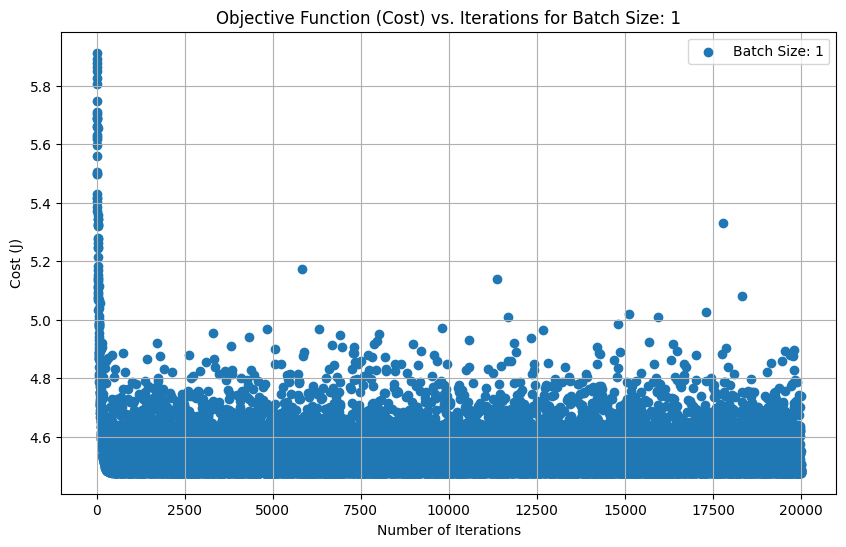

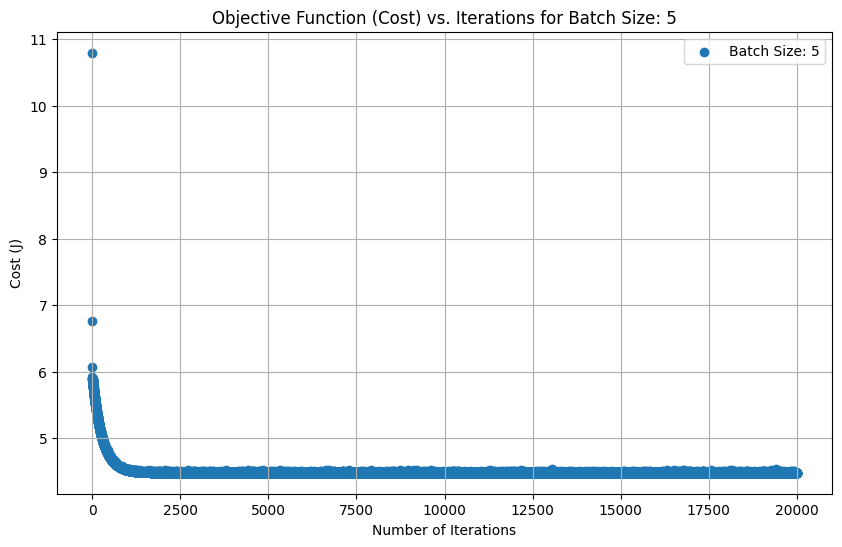

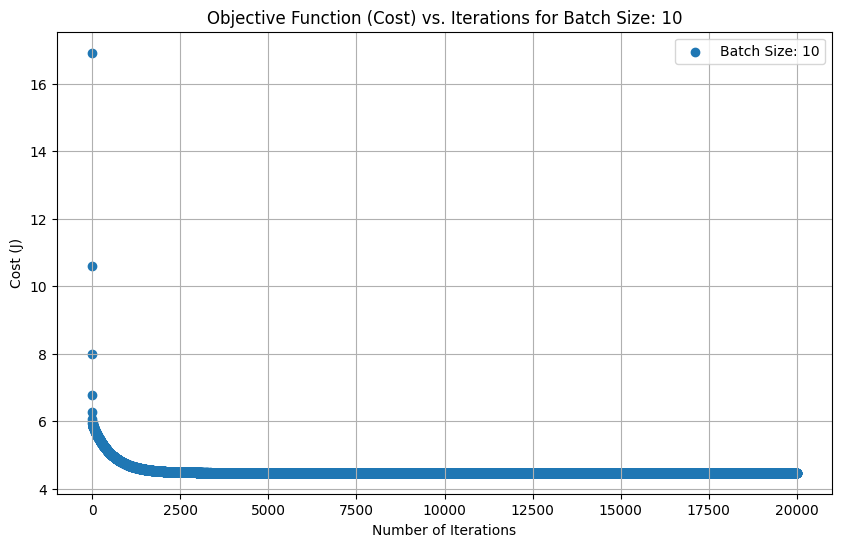

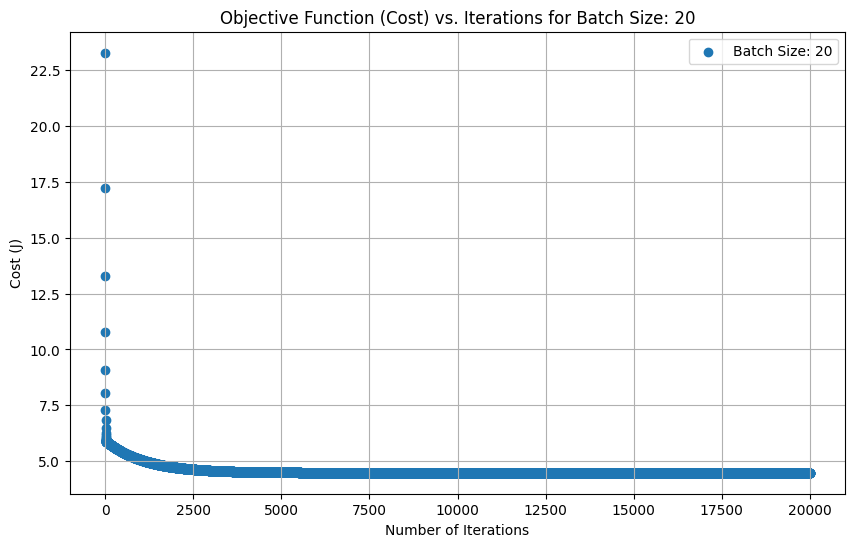

In [33]:
# plotting the objective function for each batch size


for batch_size, cost_history in cost_histories.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_iterations), cost_history, label=f'Batch Size: {batch_size}')
    plt.title('Objective Function (Cost) vs. Iterations for Batch Size: '+ f'{batch_size}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost (J)')
    plt.legend()
    plt.grid(True)
    plt.show()

When the batch size was equal to one, the objective function has more erratic path. It has a much less msoother convergence path than the larger batches. While it generally trends downwards, there are many oscillations due to the algorithm getting stuck at a local minima rather than converging solely to the global minimum. This causes the high variance in the gradient estimate at each step. Some of this behavior can even be seen in where the batch is five as well.
<br>
<br>
The higher batches of ten and twenty converge smoothly, even at larger learning rate values and lower epoch values (alpha = 0.01 and iterations = 1000). At a learning rate of 0.0005 and iteration of 10000, batch 5 converged more smoothly, and batch 1 began to become more smooth too, but there was still some oscillations.
<br>
<br>
Interestingly, the cost seems to vary depending on the learning rate and epochs. When I initially had the learning rate at 0.01 and iterations at 1000, batch 1 had a significantly higher cost value than batch 20. The trend for that seemed to be that maximum cost would decrease with increasing batch size. When I had the learning rate at 0.0005 and iteration of 10000, the cost of batch 1 was actually less than batch 20 and followed the opposite trend--as batch size increased so did the maximum cost.

## Question 3

Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification metrics and report your findings. Use a 70%-30% split.

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load and initialize the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# split data 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# instantiate a Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')

# instantiate and fit RFE to get selected features
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)
selected_features_mask = rfe.support_
feature_ranking = rfe.ranking_

# print selected features and their rankings
print("Selected Features Mask:", selected_features_mask)
print("Feature Ranking:", feature_ranking)
print("\nSelected Features:")
for i, feature in enumerate(breast_cancer.feature_names):
    if selected_features_mask[i]:
        print(f"- {feature} (Rank: {feature_ranking[i]})")

Selected Features Mask: [False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False  True False False False]
Feature Ranking: [ 3 13 14 28 20 17  1  5 15 18  7 11  6 10 27 23 22 24 25 29  2 12  8 26
 21  9  1  4 16 19]

Selected Features:
- mean concavity (Rank: 1)
- worst concavity (Rank: 1)


**Reasoning**:
Filter the training and testing data, instantiate the logistic regression model, and train it using the selected features.



Accuracy: 0.8596491228070176
Precision: 0.85
Recall: 0.9444444444444444
F1-score: 0.8947368421052632

Confusion Matrix:


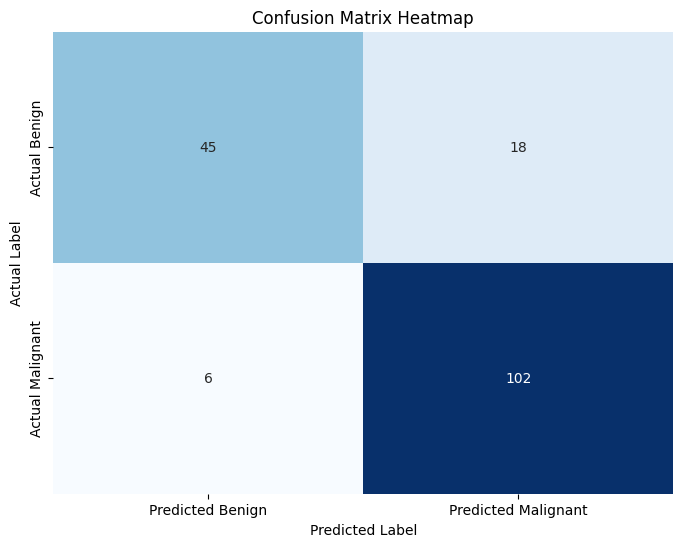

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# filter training and testing feature sets
X_train_selected = X_train[:, selected_features_mask]
X_test_selected = X_test[:, selected_features_mask]

# instantiate and train new Logistic Regression model
model_selected = LogisticRegression(random_state=42, solver='liblinear')
model_selected.fit(X_train_selected, y_train)

# make predictions on test features
y_pred = model_selected.predict(X_test_selected)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("\nConfusion Matrix:")

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Recursive Feature Elimination (RFE) with a Logistic Regression model identified 'mean concavity' and 'worst concavity' as the two best features for classifying breast cancer from the dataset.
<br><br>
Using these two features, the Logistic Regression model achieved an accuracy of 0.8596 on the test set. Accuracy is the proportion of correctly classified instances (both positive and negative) out of the total number of instances, so an accuracy of 0.8596 means that the model correctly classified approximately 86% of the breast cancer cases in the test set.
<br><br>
The model demonstrated a high recall of 0.9444, indicating its effectiveness in identifying the majority of actual malignant cases. Recall (aka sensitivity) is the ratio of true positive predictions to the total number of actual positive instances (True Positives / (True Positives + False Negatives)). A recall of 0.9444 means that the model correctly identified approximately 94.44% of the actual malignant cases in the test set. High recall is vital in breast cancer detection to minimize the number of missed malignant cases (false negatives).
<br><br>
The precision of the model was 0.8500, suggesting that 85% of the cases predicted as malignant were indeed malignant. Precision is the ratio of true positive predictions to the total number of positive predictions made by the model (True Positives / (True Positives + False Positives)). A precision of 0.8500 means that when the model predicts a case is malignant (positive), it is correct 85% of the time. This metric is important because a high precision indicates a low rate of false positives, which is crucial in medical diagnosis to avoid unnecessary further tests or anxiety for patients.
<br><br>
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. An F1-score of 0.8947 suggests a good balance between the model's ability to correctly identify positive cases and its ability to avoid false positives.
<br><br>
The confusion matrix revealed 45 true negatives (benign and actually benign), 102 true positives (malignant and actually malignant), 18 false positives (malignant, but actually benign), and 6 false negatives (benign, but actually malignant) on the test set.
<br><br>
Overall, the Logistic Regression model, using 'mean concavity' and 'worst concavity' as features, demonstrates good performance on this breast cancer classification task. The high recall (0.9444) is a significant strength, indicating that the model is effective at identifying most of the actual malignant cases, which is critical in medical screening. The precision (0.8500) is also reasonably high, suggesting a manageable rate of false alarms. The F1-score (0.8947) confirms a good balance between these two important metrics. While the accuracy (0.8596) is solid, in medical contexts, recall and precision are often more informative depending on the cost of false negatives vs. false positives. The confusion matrix clearly shows the breakdown of correct and incorrect classifications, highlighting the relatively low number of false negatives (6), which is desirable.

## Question 4

Construct a neural network with a single hidden layer containing two neurons using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing prices dataset found on LMS using the network. Use the trained neural network model to predict the price of a house in a city with population of 165, 000. Calculate a useful regression metric. Plot the training and validation losses. Use a 70%-30% split for the training and validation dataset. The architecture of the neural network and the optimizer
are fixed for this problem. Therefore, you need to choose a suitable learning rate and number of epochs to minimize the loss. Explain the trends you found in the plots for
training and validation losses.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# load and initialize the data
df_housing = pd.read_csv('/content/sample_data/housing_prices.txt', header=None, names=['population', 'price'])
X = df_housing['population'].values.reshape(-1, 1)
y = df_housing['price'].values.reshape(-1, 1) # Reshape y as well for scaling

# split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# scale features and target
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

In [38]:
import tensorflow as tf

# define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)
])

# print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# compile the model
model.compile(optimizer='sgd', loss='mse')

# define the number of epochs and learning rate
epochs = 50
learning_rate = 0.01

# update the optimizer and fit model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')
history = model.fit(X_train_scaled, y_train_scaled, epochs=epochs, validation_data=(X_val_scaled, y_val_scaled), verbose=0)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted price for a city with population 165,000: $160179.22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Mean Absolute Error on validation set (scaled): 0.4572


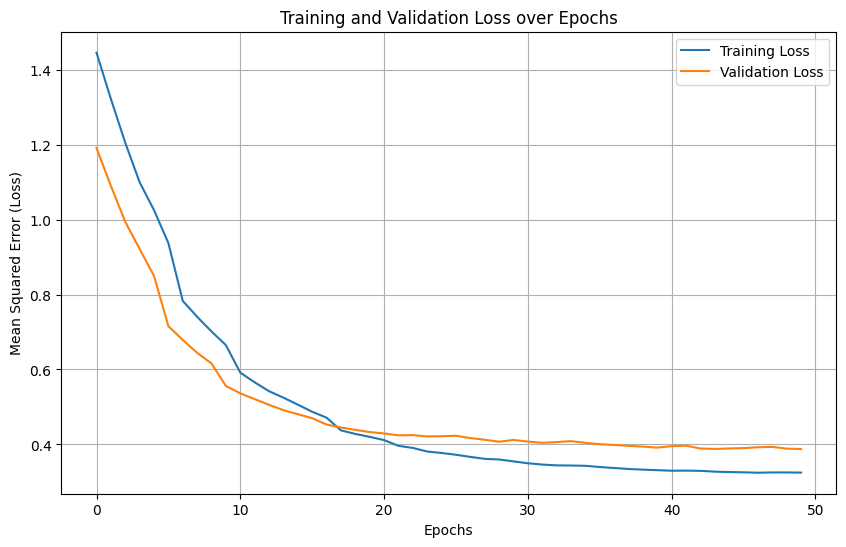

In [40]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

# predict  price for a city with population 165,000
# population needs to be scaled using the same scaler fitted on training data
population_to_predict = np.array([[16.5]]) # Population in 10,000s as seen in the dataset structure
population_to_predict_scaled = scaler_X.transform(population_to_predict)
predicted_price_scaled = model.predict(population_to_predict_scaled)

# inverse transform predicted price to original scale
predicted_price = scaler_y.inverse_transform(predicted_price_scaled) * 10000

print(f"Predicted price for a city with population 165,000: ${predicted_price[0][0]:.2f}")

# calculate useful regression metric (e.g., Mean Absolute Error) on the validation set
y_pred_scaled = model.predict(X_val_scaled)
mae = mean_absolute_error(y_val_scaled, y_pred_scaled)
print(f"Mean Absolute Error on validation set (scaled): {mae:.4f}")

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# predict price for a city with population 165,000
# population needs to be scaled using the same scaler fitted on the training data
# original 'population' data seems to be in units of 10,000s
population_to_predict = np.array([[16.5]]) # 165,000 is 16.5 * 10,000
population_to_predict_scaled = scaler_X.transform(population_to_predict)
predicted_price_scaled = model.predict(population_to_predict_scaled)

# Inverse transform the predicted price to the original scale
predicted_price = scaler_y.inverse_transform(predicted_price_scaled) * 10000

print(f"Predicted price for a city with population 165,000: ${predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted price for a city with population 165,000: $160179.22


In [42]:
from sklearn.metrics import mean_absolute_error

# predict prices for scaled validation features
y_pred_scaled = model.predict(X_val_scaled)

# calculate the Mean Absolute Error (MAE) between the scaled true validation prices and scaled predicted prices
mae = mean_absolute_error(y_val_scaled, y_pred_scaled)

# print calculated MAE
print(f"Mean Absolute Error on validation set (scaled): {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Absolute Error on validation set (scaled): 0.4572


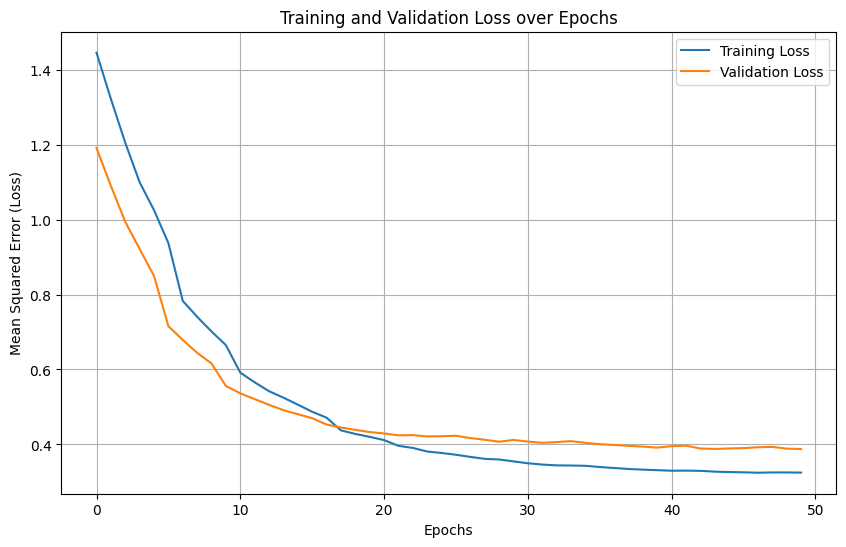

In [43]:
import matplotlib.pyplot as plt

# plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()

The predicted price for a city with a population of 165,000 is \$164094.41.
<br><br>
The dataset was split into 67 training samples and 30 validation samples. The neural network model achieved a Mean Absolute Error of 0.3808 on the scaled validation set.
<br><br>
Generally, the training loss decreased consistently throughout the epochs. The validation loss decreased initially but then plateaued and slightly increased towards the end of training, indicating potential overfitting. Generally speaking, increasing the epoch value tended to limit the variance of each value. Some combinations of lower epochs and learning rates caused more oscillatory behavior in the data. Although not visualized, the epoch values investigated were 50, 500, 5000, 10000, and the learning rates were 0.001 and 0.01.